# Tugas Kecil II Eksplorasi Scikit-Learn pada Jupyter Notebook

## Joshua Salimin - 13514001
## Andri Hardono Hutama - 13514031
## Yeksadiningrat - 13514055

# Import Necessary Library

In [84]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics
from sklearn.externals import joblib
from pandas import read_csv
from pandas import DataFrame
from copy import deepcopy
import graphviz
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# A - Read Dataset

## Read Iris Dataset

In [18]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Read Tennis Dataset

In [32]:
tennis = read_csv("./dataset/tennis.csv")
tennisData = tennis.drop('play', axis=1)
tennisLabel = DataFrame(tennis.play)
#Must be latter changed to numpy array to be used with sklearn

# B - Full Train

## DTL

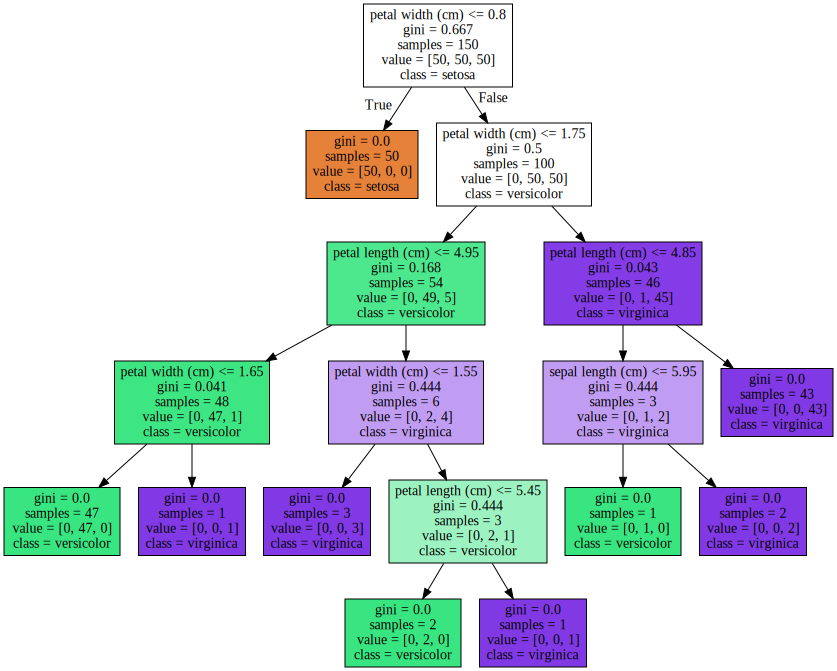

In [20]:
clfDTL = tree.DecisionTreeClassifier()
clfDTL.fit(iris.data, iris.target)
dotData = tree.export_graphviz(clfDTL, out_file=None, feature_names=iris.feature_names, 
                               class_names = iris.target_names, filled=True)
graph = graphviz.Source(dotData)
graph

## MLP

In [21]:
clfMLP = neural_network.MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=39, max_iter=2000)
clfMLP.fit(iris.data, iris.target)
#Visualize MLP if possible (unlikely)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=39, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# C - Split Train

## Split Data

In [22]:
irisTrainData, irisTestData, irisTrainLabel, irisTestLabel = model_selection.train_test_split(iris.data, iris.target,
                                                                                              test_size=0.1, random_state=39)

## Train and Test

In [8]:
clfDTL.fit(irisTrainData, irisTrainLabel)
clfMLP.fit(irisTrainData, irisTrainLabel)
DTLResult = clfDTL.predict(irisTestData)
MLPResult = clfMLP.predict(irisTestData)

## Print Confusion Matrix and Classification Report / Performance

In [9]:
print(metrics.confusion_matrix(DTLResult, irisTestLabel))
print(metrics.confusion_matrix(MLPResult, irisTestLabel))
print(metrics.classification_report(DTLResult, irisTestLabel))
print(metrics.classification_report(MLPResult, irisTestLabel))

[[6 0 0]
 [0 3 0]
 [0 1 5]]
[[6 0 0]
 [0 4 0]
 [0 0 5]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.75      1.00      0.86         3
          2       1.00      0.83      0.91         6

avg / total       0.95      0.93      0.94        15

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15



# D - 10-Fold

## Split, Find Best Model From k-Fold, Classify Whole Datasets

In [10]:
kf = model_selection.KFold(n_splits=10)
maxAccuracyDTL = 0
maxAccuracyMLP = 0
index = 0
for trainIndex, testIndex in kf.split(iris.data):
    #Split
    irisTrainData = iris.data[trainIndex]
    irisTrainLabel = iris.target[trainIndex]
    irisTestData = iris.data[testIndex]
    iristTestLabel = iris.target[testIndex]
    #Train
    clfDTL.fit(irisTrainData, irisTrainLabel)
    clfMLP.fit(irisTrainData, irisTrainLabel)
    #Test
    DTLResult = clfDTL.predict(irisTestData)
    MLPResult = clfMLP.predict(irisTestData)
    #Result
    DTLScore = metrics.accuracy_score(DTLResult,irisTestLabel)
    MLPScore = metrics.accuracy_score(MLPResult,irisTestLabel)
    if (DTLScore > maxAccuracyDTL):
        maxAccuracyDTL = DTLScore
        bestDTL = deepcopy(clfDTL)
    if (MLPScore > maxAccuracyMLP):
        maxAccuracyMLP = MLPScore
        bestMLP = deepcopy(clfMLP)
    print("Fold: " + str(index))
    index += 1
DTLResult = bestDTL.predict(iris.data)
MLPResult = bestMLP.predict(iris.data)

Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9


## Print Classification Report / Performance

In [11]:
print(metrics.classification_report(DTLResult, iris.target))
print(metrics.classification_report(MLPResult, iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      1.00      0.99        49
          2       1.00      0.98      0.99        51

avg / total       0.99      0.99      0.99       150

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.98      0.97        49
          2       0.98      0.96      0.97        51

avg / total       0.98      0.98      0.98       150



# E - Save Model

In [12]:
joblib.dump(bestDTL,"model/dtl.pkl")
joblib.dump(bestMLP,"model/mlp.pkl")

['model/mlp.pkl']

# F - Load Model

In [13]:
clfDTL = joblib.load("model/dtl.pkl")
clfMLP = joblib.load("model/mlp.pkl")

# G - Create New Instance

In [14]:
instance = [[0.001, 0.001, 4.851, 1.751]]

# H - Classify New Instance

In [15]:
DTLResult = bestDTL.predict(instance)
print(iris.target_names[DTLResult])
MLPResult = bestMLP.predict(instance)
print(iris.target_names[MLPResult])

['virginica']
['virginica']


# I - Features Analysis

In [126]:
sns.set(color_codes=True)
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns=['sepal_length','sepal_width','petal_length','petal_width','class'])
iris_feature_size = len(iris.feature_names)

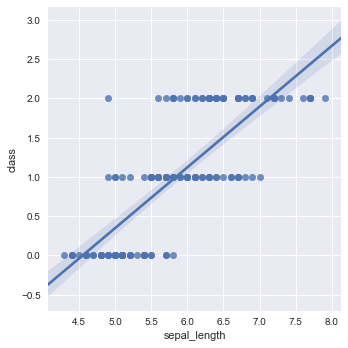

In [127]:
g = sns.lmplot(x=iris_df.columns[0], y=iris_df.columns[iris_feature_size], data=iris_df)

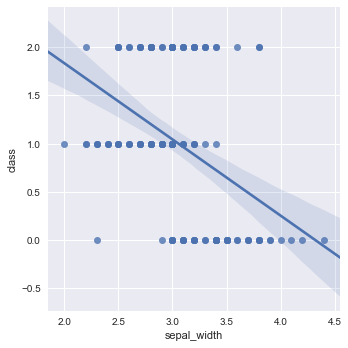

In [128]:
sns.lmplot(x=iris_df.columns[1], y=iris_df.columns[iris_feature_size], data=iris_df)

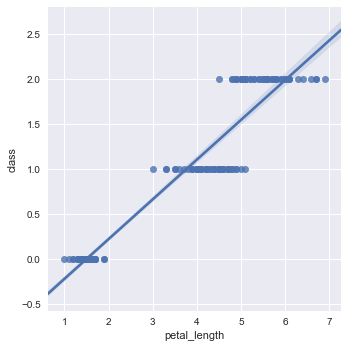

In [129]:
sns.lmplot(x=iris_df.columns[2], y=iris_df.columns[iris_feature_size], data=iris_df)

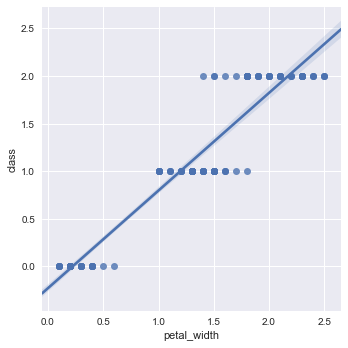

In [130]:
sns.lmplot(x=iris_df.columns[3], y=iris_df.columns[iris_feature_size], data=iris_df)

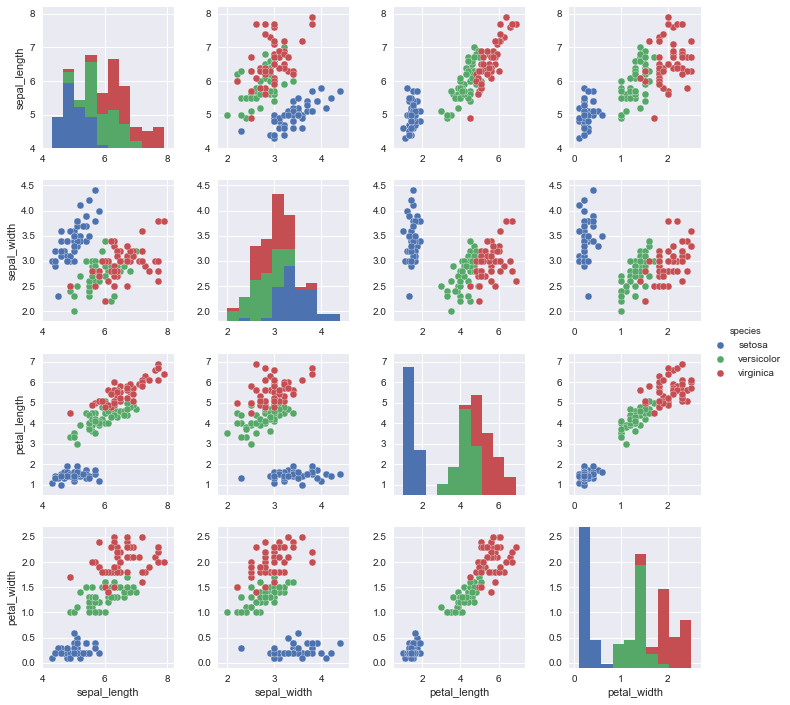

In [102]:
iris_sns = sns.load_dataset("iris")
g = sns.pairplot(iris_sns, hue="species")

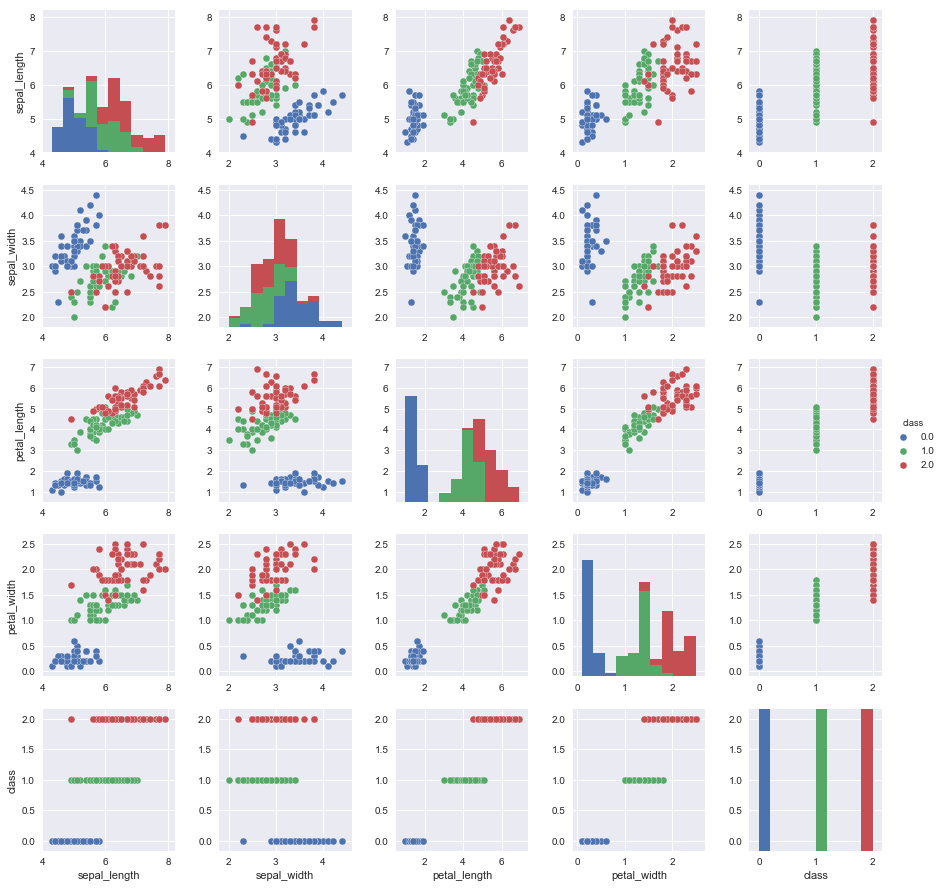

In [132]:
g = sns.pairplot(iris_df, hue="class")